<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Расчет-эффективности-обогащения" data-toc-modified-id="Расчет-эффективности-обогащения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Расчет эффективности обогащения</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборке" data-toc-modified-id="Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборке-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Сравнение распределения размеров гранул сырья на обучающей и тестовой выборке</a></span></li><li><span><a href="#Суммарная-концетрация-всех-веществ-на-разных-стадиях" data-toc-modified-id="Суммарная-концетрация-всех-веществ-на-разных-стадиях-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Суммарная концетрация всех веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeRegressor" data-toc-modified-id="DecisionTreeRegressor-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>DecisionTreeRegressor</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)
df_train = pd.read_csv('/home/cookie/projects/gold_recovery_train_new.csv')
df_test = pd.read_csv('/home/cookie/projects/gold_recovery_test_new.csv')
df_full = pd.read_csv('/home/cookie/projects/gold_recovery_full_new.csv')

In [3]:
df_train.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [4]:
df_test.head(10)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

In [5]:
df_full.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [6]:
display(df_train.shape)
display(df_test.shape)
display(df_full.shape)

(14149, 87)

(5290, 53)

(19439, 87)

In [7]:
print('df_train')
display(df_train.info())
print('df_test')
display(df_test.info())
print('df_full')
display(df_full.info())

df_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null 

None

df_test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  prim

None

df_full
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  

None

In [8]:
display(df_train.isnull().mean())
display(df_test.isnull().mean())
display(df_full.isnull().mean())

date                                          0.000000
final.output.concentrate_ag                   0.000071
final.output.concentrate_pb                   0.000071
final.output.concentrate_sol                  0.014913
final.output.concentrate_au                   0.000000
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.000071
secondary_cleaner.state.floatbank5_b_air      0.000071
secondary_cleaner.state.floatbank5_b_level    0.000071
secondary_cleaner.state.floatbank6_a_air      0.000141
secondary_cleaner.state.floatbank6_a_level    0.000071
Length: 87, dtype: float64

date                                          0.000000
primary_cleaner.input.sulfate                 0.000756
primary_cleaner.input.depressant              0.000945
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                0.000756
primary_cleaner.state.floatbank8_a_air        0.000000
primary_cleaner.state.floatbank8_a_level      0.000000
primary_cleaner.state.floatbank8_b_air        0.000000
primary_cleaner.state.floatbank8_b_level      0.000000
primary_cleaner.state.floatbank8_c_air        0.000000
primary_cleaner.state.floatbank8_c_level      0.000000
primary_cleaner.state.floatbank8_d_air        0.000000
primary_cleaner.state.floatbank8_d_level      0.000000
rougher.input.feed_ag                         0.000000
rougher.input.feed_pb                         0.000000
rougher.input.feed_rate                       0.000567
rougher.input.feed_size                       0.000189
rougher.input.feed_sol                        0.003970
rougher.in

date                                          0.000000
final.output.concentrate_ag                   0.000051
final.output.concentrate_pb                   0.000051
final.output.concentrate_sol                  0.010854
final.output.concentrate_au                   0.000000
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.000051
secondary_cleaner.state.floatbank5_b_air      0.000051
secondary_cleaner.state.floatbank5_b_level    0.000051
secondary_cleaner.state.floatbank6_a_air      0.000103
secondary_cleaner.state.floatbank6_a_level    0.000051
Length: 87, dtype: float64

### Расчет эффективности обогащения

In [9]:
def recovery(row):
    c = row['rougher.output.concentrate_au']
    f = row['rougher.input.feed_au']
    t = row['rougher.output.tail_au']
    
    result = ((c * (f - t)) / (f * (c - t))) * 100
    
    return result

In [10]:
recovery_calc = df_train.apply(recovery, axis=1)

In [11]:
recovery_calc

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

In [12]:
recovery_true = df_train['rougher.output.recovery']

In [13]:
recovery_true

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: rougher.output.recovery, Length: 14149, dtype: float64

In [14]:
mae(y_true=recovery_true, y_pred=recovery_calc)

9.73512347450521e-15

**Вывод** 

Если смотреть "глазами" и сравнивать значения, то вычисления совпадают, но не должна ли MAE в таком случае выдавать ноль?

Может в df_train есть пропущенные значения, а в расчетах нет, поэтому значение больше нуля. А не проверить ли

In [15]:
df_testing = df_train.dropna()

In [16]:
recovery_calc_testing = df_testing.apply(recovery, axis=1)

In [17]:
recovery_true_testing = df_testing['rougher.output.recovery']

In [18]:
mae(recovery_true_testing, recovery_calc_testing)

9.82970122149377e-15

Видимо дело было не в этом. Значит в датасете изначально расчеты были не верны 

In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [20]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


**Вывод** 

В тестовой выборке отсутствуют параметры `output`(параметры продукта) и `calculation`(расчётные характеристики)

### Предобработка данных 

In [21]:
df_test = df_test.fillna(method='ffill')
df_train = df_train.fillna(method='ffill')
df_full = df_full.fillna(method='ffill')

In [22]:
df_test = df_test.set_index('date')
df_train = df_train.set_index('date')
df_full = df_full.set_index('date')

In [23]:
rougher_recovery_test = pd.Series(df_full['rougher.output.recovery'], index=df_test.index)
final_recovery_test = pd.Series(df_full['final.output.recovery'], index=df_test.index)

df_test['rougher.output.recovery'] = rougher_recovery_test
df_test['final.output.recovery'] = final_recovery_test

**Вывод**

* Так-как данные которые находятся рядом(по времени) не сильно отличаются, то решил заполнить пропуски значениями из соседних строк  

* Добавил в тестовую выборку целевые признаки 



## Анализ данных

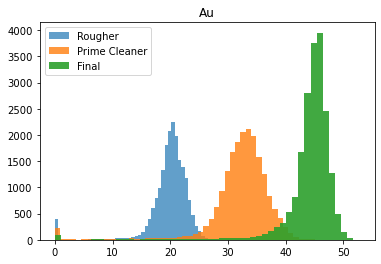

In [24]:
rougher_au = df_full['rougher.output.concentrate_au']
plt.hist(rougher_au,  bins=50, alpha=0.7)

prime_clean_au = df_full['primary_cleaner.output.concentrate_au']
plt.hist(prime_clean_au,  bins=50, alpha=0.8)

final_au = df_full['final.output.concentrate_au']
plt.hist(final_au, bins=50, alpha=0.9)
plt.title('Au')
plt.legend(['Rougher', 'Prime Cleaner', 'Final'])
plt.show()

**Вывод**

Концетрация золота увеличивается на каждом этапе отчистки

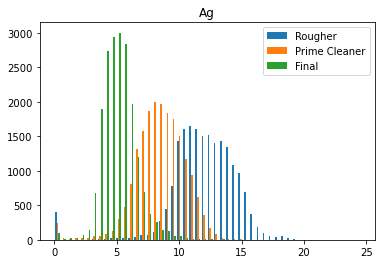

In [25]:
rougher_ag = df_full['rougher.output.concentrate_ag']
prime_clean_ag = df_full['primary_cleaner.output.concentrate_ag']
final_ag = df_full['final.output.concentrate_ag']
plt.hist([rougher_ag, prime_clean_ag, final_ag], bins=50)
plt.title('Ag')
plt.legend(['Rougher', 'Prime Cleaner', 'Final'])
plt.show()

**Вывод**

Концетрация серебра падает переходя с флотации на первичную отчистку и примерно такая же на финальной отчистке 

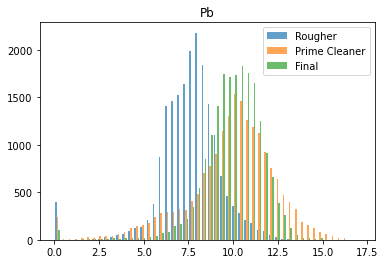

In [26]:
rougher_pb = df_full['rougher.output.concentrate_pb']
prime_clean_pb = df_full['primary_cleaner.output.concentrate_pb']
final_pb = df_full['final.output.concentrate_pb']

plt.hist([rougher_pb, prime_clean_pb, final_pb], bins=50, alpha=0.7)
plt.title('Pb')
plt.legend(['Rougher', 'Prime Cleaner', 'Final'])
plt.show()

**Вывод**

Концетрация свинца переходя с флотации на первичную отчистку возрастает и остается примерно такой же на финальной отчистке

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборке 

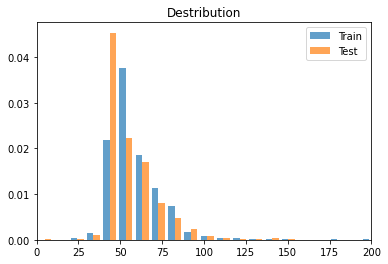

In [27]:
feed_size_train = df_train['rougher.input.feed_size']
feed_size_test = df_test['rougher.input.feed_size']

plt.hist([feed_size_train, feed_size_test], density=True, bins=50, alpha=0.7)
plt.title('Destribution')
plt.legend(['Train', 'Test'])
plt.xlim(0, 200)
plt.show()


**Вывод** 

Распределение на двух выборка примерно одинаковое 

### Суммарная концетрация всех веществ на разных стадиях

In [28]:
rougher = (df_full[['rougher.output.concentrate_au', 
                    'rougher.output.concentrate_pb', 
                    'rougher.output.concentrate_sol', 
                    'rougher.output.concentrate_ag']])

prime_clean = df_full[['primary_cleaner.output.concentrate_au',
                      'primary_cleaner.output.concentrate_pb',
                      'primary_cleaner.output.concentrate_sol',
                      'primary_cleaner.output.concentrate_ag']]

final = df_full[['final.output.concentrate_au',
                'final.output.concentrate_pb',
                'final.output.concentrate_sol',
                'final.output.concentrate_ag']]

In [29]:
rougher = rougher.apply(sum, axis=1)
prime = prime_clean.apply(sum, axis=1)
final = final.apply(sum, axis=1)


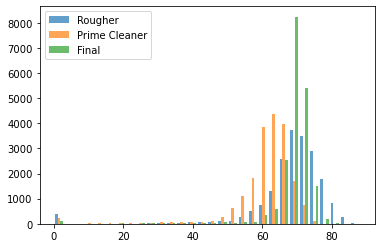

In [30]:
plt.hist([rougher, prime, final], bins=30, alpha=.7)
plt.legend(['Rougher', 'Prime Cleaner', 'Final'])
plt.show()

## Модель

In [31]:
def smape(a, f):
    smape = 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f)) * 100)
    final_smape = 0.25 * smape[0] + 0.75 * smape[1]
    return final_smape

In [32]:
smape_score = make_scorer(smape, greater_is_better=False)

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14149 non-null  float64
 1   final.output.concentrate_pb                         14149 non-null  float64
 2   final.output.concentrate_sol                        14149 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14149 non-null  float64
 7   final.output.tail_sol                               14149 non-null  float64
 8   final.output.tail_au                             

In [34]:
features = df_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target = df_train[['rougher.output.recovery', 'final.output.recovery']]

In [35]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.20, random_state=12345
)

### DecisionTreeRegressor

In [36]:
grid_tree = {
    'max_depth': list(range(1, 20))
}

model_dtr = DecisionTreeRegressor(random_state=12345)

grid_search = GridSearchCV(model_dtr, grid_tree, cv=5, scoring=smape_score)

grid_search.fit(features_train, target_train)



GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=12345),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19]},
             scoring=make_scorer(smape, greater_is_better=False))

In [37]:
grid_search.best_params_

{'max_depth': 18}

In [38]:
model_dtr = DecisionTreeRegressor(random_state=12345, max_depth=18)
model_dtr.fit(features_train, target_train)
predicted_dtr = model_dtr.predict(features_valid)

In [39]:
smape(target_valid, predicted_dtr)


2.6393106843244203

In [40]:

score_dtr = cross_val_score(model_dtr, features, target)
print(sum(score_dtr) / len(score_dtr))

0.7012566763256516


### RandomForestRegressor

In [41]:
#grid_forest = {'n_estimators': list(range(1, 11, 2)),
              
#              'max_depth': list(range(1, 11, 2))}
#model_rfr = RandomForestRegressor(random_state=12345)

#grid_search = GridSearchCV(model_rfr, grid_forest, cv=5, scoring=smape_score)

#grid_search.fit(features_train, target_train)

In [42]:
#grid_search.best_params_

In [43]:
%%time
best_smape = 0
best_est = 0
best_depth = 0


for est in range(10, 51, 10):
    for depth in range(1, 11):
        model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        smape_rfr = smape(target_valid, predictions_valid)
        if smape_rfr < best_smape:
            best_smape = smape_rfr
            best_est = est
            best_depth = depth
        
print('est:', est, 'max_depth:', depth, 'SMAPE:', smape_rfr)    

est: 50 max_depth: 10 SMAPE: 3.0792673006316553


### LinearRegression 

In [44]:
model_lreg = LinearRegression()
model_lreg.fit(features_train, target_train)
predicted_lreg = model_lreg.predict(features_valid)

In [45]:
smape_lreg = smape(target_valid, predicted_lreg)

In [46]:
print('Final sMAPE:', smape_lreg)

print()

score_lreg = cross_val_score(model_lreg, features, target, scoring=smape_score)
print(score_lreg)

Final sMAPE: 4.642843825575602

[-5.68270836 -5.40862852 -8.44645366 -7.54842327 -5.61390862]


**Общий вывод**

Модель случайного леса показывает лучшие результаты 

### Проверка модели на тестовой выборке 

In [47]:
features_train_test = features_train[df_test.columns.drop(['final.output.recovery', 'rougher.output.recovery'])]

**Питон ругался что кол-во колонок не совпадает. Я додумался только до такого решения. Либо я не правильно понял задачу и надо обучить модель так же на тестовой выборке** 

In [48]:
target_test = df_test[['rougher.output.recovery', 'final.output.recovery']]

In [49]:
target_test.shape

(5290, 2)

In [50]:
features_train_test.shape

(11319, 52)

In [51]:
model_test = RandomForestRegressor(random_state=12345, n_estimators=30, max_depth=10)
model_test.fit(features_train_test, target_train)

RandomForestRegressor(max_depth=10, n_estimators=30, random_state=12345)

In [52]:
features_test = df_test.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)

In [53]:
predictions_test = model_test.predict(features_test)

In [54]:
smape_rfr_test = smape(target_test, predictions_test)

print('Final sMAPE:', smape_rfr_test)


Final sMAPE: 10.028032578881785


## Общий вывод 


**Подготовка данных**
* Заполнил пропуски в строках значениями из соседних строк. 
* Использвал столбец с датами как индекс. 
* Добавил в тестовую выборку целевые признаки из полного датасета. 

**Расчет эффективности обогащения** 
* Расчет в "ручную" показал, что изначальные значения в данных корректны. 

**Анализ данных** 
* Концетрация золота увеличивается на каждом этапе отчистки.
* Концетрация серебра падает переходя с флотации на первичную отчистку и примерно такая же на финальной отчистке.
* Концетрация свинца переходя с флотации на первичную отчистку возрастает и остается примерно такой же на финальной отчистке.

**Сравнение распределения размеров гранул сырья на обучающей и тестовой выборке**
* На тестовой и обучающей выборке распределение размеров гранул примерно одинаковое.

**Суммарная концетрация всех веществ на разных стадиях**
* Суммарная концетрация возрастает переходя с флотации до финальной отчистки.

**Проверка и выбор моделей** 
* Выбрал для этого проекта модели дерева решений, случайного леса и ленейной регрессии. Из них лучшие результаты показывает модель случайного леса.

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке